# <font color='Blue'>Clustering case study data with mixed types using kmeans</font>

# <font color='Blue'>Loading Libraries</font>

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

## <font color='Blue'>1.0 Loading Data</font>

In [3]:
mktres = pd.read_csv( "mkt_res.csv" )
# Parking data in another dataframe
data = mktres
data.head(10)

,ID,Gender,Marital_Status,Work_Status,Education,Annual_Income,Age,Location,Purchasing_Decision_Maker,Purchasing_Location,Monthly_Electronics_Spend,Monthly_Household_Spend,Purchasing_Frequency,Technology_Adoption,Viewing_hours_day,Favorite_feature
0,1,male,married,professional,none,49,30,Florida,family,mass-consumer electronics,35,150,13,late,2,saving favorite shows to watch as a family
1,2,male,single,none,none,46,36,Alabama,single,mass-consumer electronics,35,163,26,late,10,saving favorite shows to watch as a family
2,3,male,married,professional,BA,58,66,Massachusetts,family,specialty stores,64,103,13,early,0,time shifting
3,4,male,married,none,PhD,51,78,New York,family,mass-consumer electronics,33,154,22,late,5,saving favorite shows to watch as a family
4,5,female,single,none,none,46,52,Montana,single,mass-consumer electronics,45,161,47,late,2,saving favorite shows to watch as a family
5,6,female,married,none,BA,31,72,New Jersey,single,retail,14,21,32,early,1,time shifting
6,7,male,married,professional,none,33,62,California,single,discount,18,40,41,early,0,cool gadget
7,8,male,married,none,none,29,30,New Hampshire,single,retail,23,75,9,early,1,schedule control
8,9,male,married,professional,none,57,60,Massachusetts,family,specialty stores,74,358,1,early,0,schedule control
9,10,female,married,professional,none,30,59,Idaho,family,discount,16,78,25,early,0,schedule control


## <font color='Blue'>1.1 Get the column names</font>

In [4]:
columns = list(data.columns) 
print(columns)
print("")

['ID', 'Gender', 'Marital_Status', 'Work_Status', 'Education', 'Annual_Income', 'Age', 'Location', 'Purchasing_Decision_Maker', 'Purchasing_Location', 'Monthly_Electronics_Spend', 'Monthly_Household_Spend', 'Purchasing_Frequency', 'Technology_Adoption', 'Viewing_hours_day', 'Favorite_feature']



## <font color='Blue'>1.2 Adding derived data</font>

In [5]:
data['Annual_Electronics_Spend'] = data['Monthly_Electronics_Spend']*12
data['Annual_Household_Spend']   = data['Monthly_Household_Spend']*12 
data['Electronic_Spend_Perc'] = (data['Annual_Electronics_Spend']/data['Annual_Household_Spend'])*100
data['Electronic_Spend_Perc'] = data['Electronic_Spend_Perc'].round(2)

# Number of raws and columns
print("#Rows and #Columns",data.shape)
print("")

#Rows and #Columns (1000, 19)



## <font color='Blue'>1.3 Drop columns not need for clustering</font>

In [6]:
data = data.drop(['ID','Location','Annual_Household_Spend','Monthly_Electronics_Spend','Monthly_Household_Spend'],axis=1)
print("#Rows and #Columns",data.shape)
print("")
columns = list(data.columns) 
print(columns)

#Rows and #Columns (1000, 14)

['Gender', 'Marital_Status', 'Work_Status', 'Education', 'Annual_Income', 'Age', 'Purchasing_Decision_Maker', 'Purchasing_Location', 'Purchasing_Frequency', 'Technology_Adoption', 'Viewing_hours_day', 'Favorite_feature', 'Annual_Electronics_Spend', 'Electronic_Spend_Perc']


## <font color='Blue'>1.4 Dummy Coding Variables</font>

In [7]:
dummy      = ['Gender', 'Marital_Status', 'Work_Status', 'Education','Purchasing_Decision_Maker','Purchasing_Location','Technology_Adoption','Favorite_feature']
dummydata  = pd.get_dummies(data, columns=dummy)
dummydata.head()

#Columns
print("#Rows and #Columns",dummydata.shape)
print("")
columns = list(dummydata.columns) 
print(columns)

#Rows and #Columns (1000, 30)

['Annual_Income', 'Age', 'Purchasing_Frequency', 'Viewing_hours_day', 'Annual_Electronics_Spend', 'Electronic_Spend_Perc', 'Gender_female', 'Gender_male', 'Marital_Status_married', 'Marital_Status_single', 'Work_Status_none', 'Work_Status_professional', 'Education_BA', 'Education_MA', 'Education_PhD', 'Education_none', 'Purchasing_Decision_Maker_family', 'Purchasing_Decision_Maker_single', 'Purchasing_Location_discount', 'Purchasing_Location_mass-consumer electronics', 'Purchasing_Location_retail', 'Purchasing_Location_specialty stores', 'Purchasing_Location_web (ebay)', 'Technology_Adoption_early', 'Technology_Adoption_late', 'Favorite_feature_cool gadget', 'Favorite_feature_programming/interactive features', 'Favorite_feature_saving favorite shows to watch as a family', 'Favorite_feature_schedule control', 'Favorite_feature_time shifting']


## <font color='Blue'>1.5 Examining Data</font>

In [8]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Annual_Income                                                1000 non-null   int64  
 1   Age                                                          1000 non-null   int64  
 2   Purchasing_Frequency                                         1000 non-null   int64  
 3   Viewing_hours_day                                            1000 non-null   int64  
 4   Annual_Electronics_Spend                                     1000 non-null   int64  
 5   Electronic_Spend_Perc                                        1000 non-null   float64
 6   Gender_female                                                1000 non-null   uint8  
 7   Gender_male                                                  1000 non-null   ui

In [9]:
dummydata.head()

,Annual_Income,Age,Purchasing_Frequency,Viewing_hours_day,Annual_Electronics_Spend,Electronic_Spend_Perc,Gender_female,Gender_male,Marital_Status_married,Marital_Status_single,...,Purchasing_Location_retail,Purchasing_Location_specialty stores,Purchasing_Location_web (ebay),Technology_Adoption_early,Technology_Adoption_late,Favorite_feature_cool gadget,Favorite_feature_programming/interactive features,Favorite_feature_saving favorite shows to watch as a family,Favorite_feature_schedule control,Favorite_feature_time shifting
0,49,30,13,2,420,23.33,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
1,46,36,26,10,420,21.47,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,58,66,13,0,768,62.14,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,51,78,22,5,396,21.43,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,46,52,47,2,540,27.95,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0


## <font color='Blue'>1.6 Normalizing Non-Categorical Variables</font>

In [10]:
scaler = StandardScaler()
dummydata[["Annual_Income"]]               = scaler.fit_transform(dummydata[["Annual_Income"]])
dummydata[["Age"]]                         = scaler.fit_transform(dummydata[["Age"]])
dummydata[["Purchasing_Frequency"]]        = scaler.fit_transform(dummydata[["Purchasing_Frequency"]])
dummydata[["Annual_Electronics_Spend"]]    = scaler.fit_transform(dummydata[["Annual_Electronics_Spend"]])
dummydata[["Electronic_Spend_Perc"]]       = scaler.fit_transform(dummydata[["Electronic_Spend_Perc"]])
dummydata[["Viewing_hours_day"]]           = scaler.fit_transform(dummydata[["Viewing_hours_day"]])
dummydata.head()

,Annual_Income,Age,Purchasing_Frequency,Viewing_hours_day,Annual_Electronics_Spend,Electronic_Spend_Perc,Gender_female,Gender_male,Marital_Status_married,Marital_Status_single,...,Purchasing_Location_retail,Purchasing_Location_specialty stores,Purchasing_Location_web (ebay),Technology_Adoption_early,Technology_Adoption_late,Favorite_feature_cool gadget,Favorite_feature_programming/interactive features,Favorite_feature_saving favorite shows to watch as a family,Favorite_feature_schedule control,Favorite_feature_time shifting
0,0.322666,-1.027302,-0.719876,-0.127200,0.236954,-0.915874,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0.225798,-0.691290,0.217275,2.623078,0.236954,-1.026173,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0.613268,0.988773,-0.719876,-0.814770,1.938706,1.385574,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0.387244,1.660798,-0.071079,0.904154,0.119592,-1.028545,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0.225798,0.204744,1.731134,-0.127200,0.823765,-0.641906,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0


## <font color='Blue'>2.0 Generating k-means Solutions</font>

###  <font color='Blue'>2.1 Generate 3 cluster and 4 cluster solution using k-means</font>

In [11]:
clusterid3 = KMeans(3).fit(dummydata).labels_
clusterid4 = KMeans(4).fit(dummydata).labels_

###  <font color='Blue'>2.2 Assign Cluster Labels</font>

In [12]:
data["clusterid3"] = clusterid3
data["clusterid4"] = clusterid4
cluster_size3 = data.groupby(['clusterid3']).size() 
cluster_size4 = data.groupby(['clusterid4']).size() 
print(cluster_size3)
print("")
print(cluster_size4)
print("")

clusterid3
0    168
1    633
2    199
dtype: int64

clusterid4
0    494
1    141
2    168
3    197
dtype: int64



###  <font color='Blue'>2.3 Scree Plot</font>

In [14]:
import collections 
def CountFrequency(arr): 
    return collections.Counter(arr)

Counter({0: 1000})
Counter({0: 635, 1: 365})
Counter({1: 633, 0: 199, 2: 168})
Counter({1: 495, 0: 197, 2: 167, 3: 141})
Counter({2: 495, 0: 197, 3: 165, 1: 141, 4: 2})
Counter({1: 350, 3: 195, 4: 164, 5: 152, 0: 137, 2: 2})
Counter({2: 350, 3: 164, 5: 151, 0: 134, 4: 114, 1: 85, 6: 2})
Counter({5: 201, 1: 190, 4: 162, 0: 131, 2: 115, 3: 114, 6: 85, 7: 2})
Counter({6: 168, 2: 162, 4: 131, 3: 125, 1: 115, 0: 114, 8: 98, 7: 85, 5: 2})
Counter({3: 160, 2: 159, 9: 124, 8: 118, 0: 112, 1: 99, 4: 99, 6: 87, 7: 40, 5: 2})
cluster_errors: [10367.838000000003, 8686.801180287333, 7490.403787165739, 6664.1498072598715, 5838.132069755314, 5467.717385948902, 5152.4045057497515, 4865.198758350611, 4704.827130827954, 4576.109920577791]


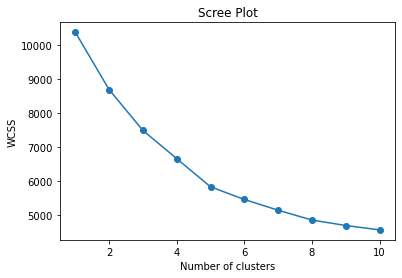

In [15]:
cluster_range = range( 1, 11 )
cluster_errors = []  # Captures WSS

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dummydata )
    cluster_errors.append( clusters.inertia_ )
    print(CountFrequency(clusters.labels_))
   
print("cluster_errors:", cluster_errors)
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.xlabel('Number of clusters');
plt.ylabel('WCSS');
plt.title( "Scree Plot");

    1. Scree-plot indicates a four cluster solution.
    2. Size wise = cluster solutions containing either 3 or 4 clusters look good 

###  <font color='Blue'>2.4 Performance Measure: Silhouette Score</font>

In [14]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(dummydata, clusterid3))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(dummydata, clusterid4))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.234
Silhouette Coefficient: 0.224


###  <font color='Blue'>2.5 Performance Measure: Calinski-Harabasz index</font>

In [15]:
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(dummydata, clusterid3))
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(dummydata, clusterid4))

Calinski-Harabasz index: 191.498
Calinski-Harabasz index: 184.516


###  <font color='Blue'>3.0 Examining Chararcteristics</font>

In [16]:
values=['Annual_Income','Age','Purchasing_Frequency','Viewing_hours_day','Annual_Electronics_Spend','Electronic_Spend_Perc']
index =['clusterid4']
aggfunc={'Annual_Income': np.mean,
         'Age': np.mean,
         'Purchasing_Frequency':np.mean,
         'Viewing_hours_day':np.mean,
         'Annual_Electronics_Spend':np.mean,
         'Electronic_Spend_Perc':np.mean}
result = pd.pivot_table(data,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size4
result = result.round(2)
result

,Age,Annual_Electronics_Spend,Annual_Income,Electronic_Spend_Perc,Purchasing_Frequency,Viewing_hours_day,cluster_size
clusterid4,,,,,,,
0,52.44,202.64,29.94,38.67,24.75,1.02,494
1,50.17,704.29,62.21,38.45,8.21,1.11,168
2,53.83,497.48,48.08,38.39,30.04,6.37,197
3,24.15,390.89,30.45,40.05,24.57,3.01,141


###  <font color='Blue'>3.1 Examining Chararcteristics - Cont'd</font>

In [17]:
dummydata['clusterid4'] = clusterid4
values=['Gender_female','Gender_male','Marital_Status_married','Marital_Status_single','Work_Status_none',
        'Work_Status_professional']
index =['clusterid4']
aggfunc={'Gender_female': np.mean,
         'Gender_male': np.mean,
         'Marital_Status_married':np.mean,
         'Marital_Status_single':np.mean,
         'Work_Status_none':np.mean,
         'Work_Status_professional':np.mean}
result = pd.pivot_table(dummydata,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size4
result = result.round(2)
result

,Gender_female,Gender_male,Marital_Status_married,Marital_Status_single,Work_Status_none,Work_Status_professional,cluster_size
clusterid4,,,,,,,
0,0.48,0.52,0.81,0.19,0.51,0.49,494
1,0.29,0.71,0.77,0.23,0.00,1.00,168
2,0.53,0.47,0.91,0.09,0.51,0.49,197
3,0.52,0.48,0.08,0.92,0.00,1.00,141


###  <font color='Blue'>3.2 Examining Chararcteristics - Cont'd</font>

In [18]:
dummydata['clusterid4'] = clusterid4
values=['Education_BA','Education_MA','Education_PhD','Education_none','Purchasing_Decision_Maker_family',
        'Purchasing_Decision_Maker_single']
index =['clusterid4']
aggfunc={'Education_BA': np.mean,
         'Education_MA': np.mean,
         'Education_PhD':np.mean,
         'Education_none':np.mean,
         'Purchasing_Decision_Maker_family':np.mean,
         'Purchasing_Decision_Maker_single':np.mean}
result = pd.pivot_table(dummydata,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size4
result = result.round(2)
result

,Education_BA,Education_MA,Education_PhD,Education_none,Purchasing_Decision_Maker_family,Purchasing_Decision_Maker_single,cluster_size
clusterid4,,,,,,,
0,0.15,0.03,0.02,0.81,0.50,0.50,494
1,0.61,0.15,0.10,0.14,0.77,0.23,168
2,0.25,0.25,0.25,0.25,0.91,0.09,197
3,0.25,0.26,0.25,0.25,0.02,0.98,141


###  <font color='Blue'>3.3 Examining Chararcteristics - Cont'd</font>

In [19]:
# Cluster 4 - Examining Characteristics
dummydata['clusterid4'] = clusterid4
values=['Technology_Adoption_early','Technology_Adoption_late']
index =['clusterid4']
aggfunc={'Technology_Adoption_early': np.mean,
         'Technology_Adoption_late': np.mean}
result = pd.pivot_table(dummydata,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size4
result = result.round(2)
result

,Technology_Adoption_early,Technology_Adoption_late,cluster_size
clusterid4,,,
0,1.00,0.00,494
1,1.00,0.00,168
2,0.00,1.00,197
3,0.98,0.02,141


###  <font color='Blue'>3.4 Examining Chararcteristics - Cont'd</font>

In [20]:
dummydata['clusterid4'] = clusterid4
values=['Favorite_feature_cool gadget','Favorite_feature_programming/interactive features','Favorite_feature_saving favorite shows to watch as a family',
        'Favorite_feature_schedule control','Favorite_feature_time shifting']
index =['clusterid4']
aggfunc={'Favorite_feature_cool gadget': np.mean,
         'Favorite_feature_programming/interactive features': np.mean,
         'Favorite_feature_saving favorite shows to watch as a family':np.mean,
         'Favorite_feature_schedule control':np.mean,
         'Favorite_feature_time shifting':np.mean}
result = pd.pivot_table(dummydata,values=values,
                             index =index,
                             aggfunc=aggfunc,
                             fill_value=0)
result['cluster_size'] = cluster_size4
result = result.round(2)
result

,Favorite_feature_cool gadget,Favorite_feature_programming/interactive features,Favorite_feature_saving favorite shows to watch as a family,Favorite_feature_schedule control,Favorite_feature_time shifting,cluster_size
clusterid4,,,,,,
0,0.34,0.00,0.00,0.33,0.33,494
1,0.34,0.00,0.00,0.33,0.33,168
2,0.00,0.00,1.00,0.00,0.00,197
3,0.01,0.92,0.02,0.03,0.01,141
